# imports

In [1]:
import numpy
import pandas
import matplotlib.pyplot as pyplot
from matplotlib.font_manager import FontProperties
import seaborn

import nltk
from nltk.corpus import stopwords,wordnet
from nltk.probability import FreqDist

from wordcloud import WordCloud

import re

from spacy.lang.hi import STOP_WORDS as STOP_WORDS_HI

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# %matplotlib qt
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (15, 12)
font_parameter = FontProperties(fname='gargi.ttf', size=18)
font="gargi.ttf"

In [4]:
filename="Data.csv"

In [33]:
data=pandas.read_csv('../Data/Main_Data/'+filename)

In [34]:
data

,Questions,Answers,keywards,MainQuestion
0,कठिन सवाल,माफ करना मुझे इस सवाल का जवाब देने पे कठिनाई ...,मुश्कील,कठिन सवाल
1,महाविद्यालय कॉलेज का पता अड्रेस क्या हैं colle...,डॉ. के.एम. वासुदेवन पिल्लै परिसर प्लॉट नंबर 10...,अड्रेस ऑफिस,महाविद्यालय का पता अड्रेस क्या हैं?
2,महाविद्यालय कॉलेज का फोन टेलीफोन नंबर क्या हैं...,02227456030,दूरभाष दूरध्वनी,महाविद्यालय का टेलीफोन नंबर क्या हैं?
3,महाविद्यालय कॉलेज कब स्थापित स्थापना हुआ था co...,१९९९,स्थापना,महाविद्यालय कब स्थापित स्थापना हुआ था ?
4,कॉलेज कितना बड़ा है college dikhne me kaisa ha...,कॉलेज प्राकृतिक सुंदरता से घिरी 10 एकड़ भूमि म...,NaN,कॉलेज कितना बड़ा है
5,इंजीनियरिगं में कितने विभाग ब्रैंचेस हैं engin...,6 विभाग हैं,NaN,इंजीनियरिगं में कितने विभाग ब्रैंचेस हैं
6,दिन मे कॉलेज कितने बजे कब तक होता है din me co...,शाम ४ या ५ या ६ बजे तक राहत हैं,NaN,दिन मे कॉलेज कितने बजे तक होता है?
7,लेक्चर व्याख्यान कितने घंटे चलता है lectures k...,१ घंटा लगभग,NaN,व्याख्यान कितने घंटे चलता है?
8,प्रैक्टिकल लैब कितने घंटे चलता है practical pr...,२ घंटा लगभग,NaN,प्रैक्टिकल कितने घंटे चलता है?
9,कॉलेज कैंपस में वाईफाई हैं क्या wifi hain kya ...,हा |हमारे पास एक मुफ्त और सुरक्षित वाईफाई कनेक...,NaN,कैंपस में वाईफाई हैं या?


In [7]:
data.describe()

,Questions,Answers,keywards,MainQuestion
count,13,13,4,13
unique,13,13,4,13
top,कठिन सवाल,माफ करना मुझे इस सवाल का जवाब देने पे कठिनाई ...,मुश्कील,कठिन सवाल
freq,1,1,1,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Questions     13 non-null     object
 1   Answers       13 non-null     object
 2   keywards      4 non-null      object
 3   MainQuestion  13 non-null     object
dtypes: object(4)
memory usage: 544.0+ bytes


In [9]:
[len(text.split()) for text in data['MainQuestion']]

[2, 6, 6, 7, 4, 6, 8, 5, 5, 5, 5, 5, 5]

# 👆 counting the word in every question

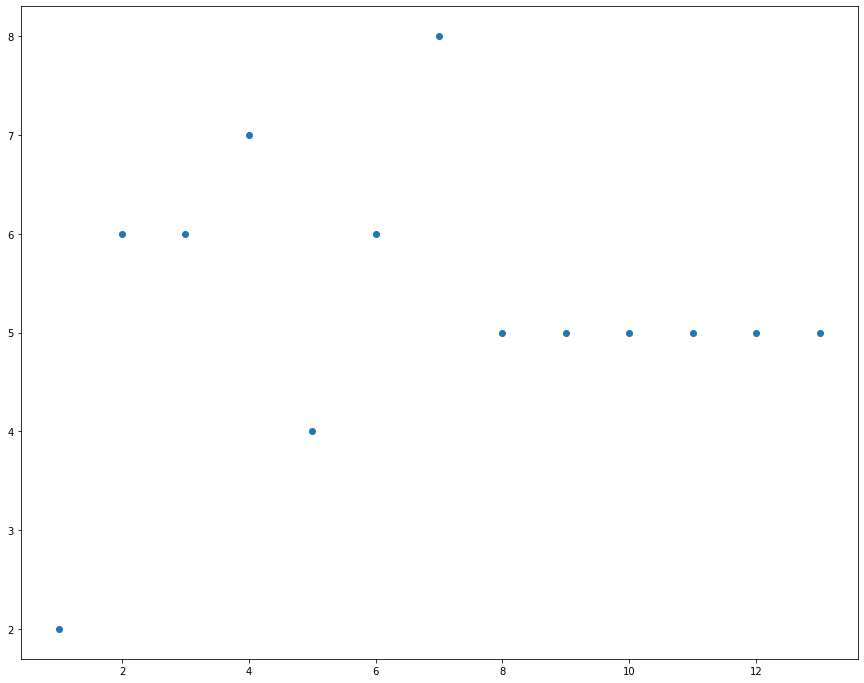

In [10]:
pyplot.scatter([i for i in range(1,len(data)+1)],[len(text.split()) for text in data['MainQuestion']])

In [11]:
Whole_Words_list=[text for text in data['MainQuestion']]
Whole_Words_list=" ".join(Whole_Words_list)
Whole_Words_list=Whole_Words_list.split()

In [12]:
Whole_Words_list

['कठिन',
 'सवाल',
 'महाविद्यालय',
 'का',
 'पता',
 'अड्रेस',
 'क्या',
 'हैं?',
 'महाविद्यालय',
 'का',
 'टेलीफोन',
 'नंबर',
 'क्या',
 'हैं?',
 'महाविद्यालय',
 'कब',
 'स्थापित',
 'स्थापना',
 'हुआ',
 'था',
 '?',
 'कॉलेज',
 'कितना',
 'बड़ा',
 'है',
 'इंजीनियरिगं',
 'में',
 'कितने',
 'विभाग',
 'ब्रैंचेस',
 'हैं',
 'दिन',
 'मे',
 'कॉलेज',
 'कितने',
 'बजे',
 'तक',
 'होता',
 'है?',
 'व्याख्यान',
 'कितने',
 'घंटे',
 'चलता',
 'है?',
 'प्रैक्टिकल',
 'कितने',
 'घंटे',
 'चलता',
 'है?',
 'कैंपस',
 'में',
 'वाईफाई',
 'हैं',
 'या?',
 'महाविद्यालय',
 'के',
 'शिक्षक',
 'कैसे',
 'हैं',
 'प्रिसीपल',
 'का',
 'नाम',
 'क्या',
 'हैं?',
 'सबसे',
 'अच्छे',
 'शिक्षक',
 'कौन',
 'हैं']

In [13]:
len(Whole_Words_list)

69

In [14]:
Word_cloud=WordCloud(width = 1200, height = 800,background_color ='white',font_path=font)

In [15]:
dictionary_of_frequency_of_word=FreqDist(Whole_Words_list)

In [16]:
dictionary_of_frequency_of_word

FreqDist({'महाविद्यालय': 4, 'कितने': 4, 'हैं': 4, 'का': 3, 'क्या': 3, 'हैं?': 3, 'है?': 3, 'कॉलेज': 2, 'में': 2, 'घंटे': 2, ...})

In [17]:
Word_cloud.generate_from_frequencies(frequencies=dictionary_of_frequency_of_word)

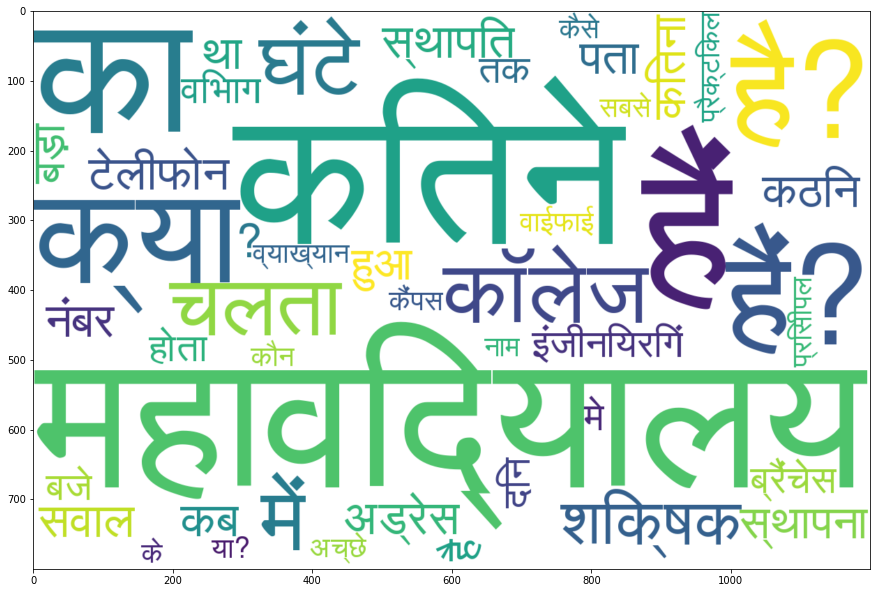

In [18]:
pyplot.imshow(Word_cloud,interpolation="bilinear")

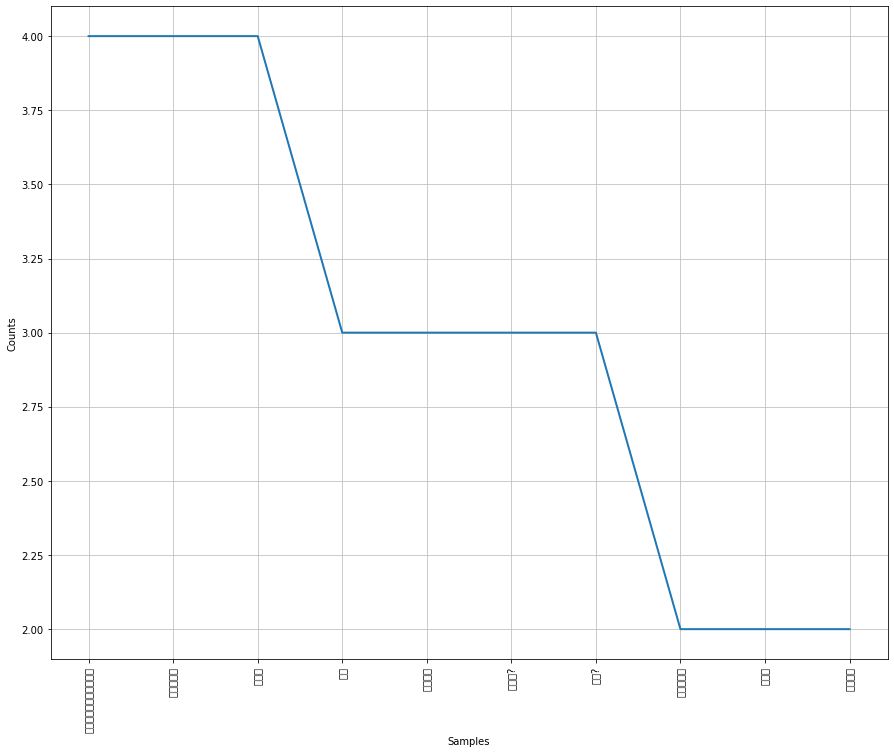

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [19]:
dictionary_of_frequency_of_word.plot(10)

In [20]:
dictionary_of_frequency_of_word.values()

dict_values([1, 1, 4, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 4, 1, 1, 4, 1, 1, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1])

<BarContainer object of 47 artists>

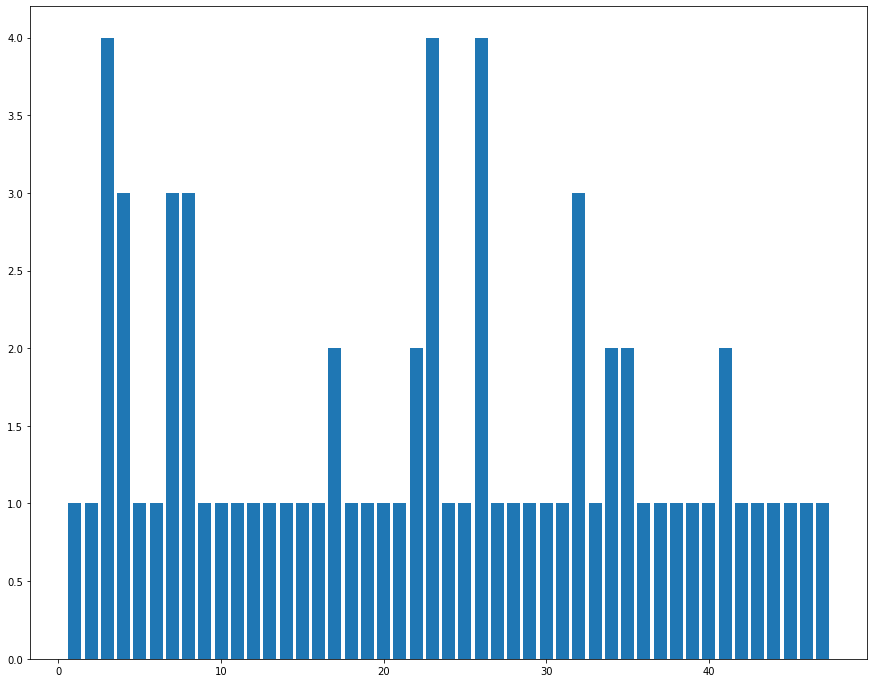

In [21]:
pyplot.bar([i for i in range(1,len(dictionary_of_frequency_of_word.values())+1)],dictionary_of_frequency_of_word.values(),)

# Morphological Preprocessing

In [22]:
Regular_expression_definition_for_digits=re.compile('\d+\s|\s\d+|\s\d+\s')

In [23]:
Defined_Stopwords=["मैं","मुझको","मेरा","अपने आप को","हमने","हमारा","अपना","हम","आप","आपका","तुम्हारा","अपने आप","स्वयं","वह","इसे","उसके","खुद को","कि वह","उसकी","उसका","खुद ही","यह","इसके","उन्होने","अपने","क्या","जो","किसे","किसको","कि","ये","हूँ","होता है","रहे","थी","थे","होना","गया","किया जा रहा है","किया है","है","पडा","होने","करना","करता है","किया","रही","एक","लेकिन","अगर","या","क्यूंकि","जैसा","जब तक","जबकि","की","पर","द्वारा","के लिए","साथ","के बारे में","खिलाफ","बीच","में","के माध्यम से","दौरान","से पहले","के बाद","ऊपर","नीचे","को","से","तक","से नीचे","करने में","निकल","बंद","से अधिक","तहत","दुबारा","आगे","फिर","एक बार","यहाँ","वहाँ","कब","कहाँ","क्यों","कैसे","सारे","किसी","दोनो","प्रत्येक","ज्यादा","अधिकांश","अन्य","में कुछ","ऐसा","में कोई","मात्र","खुद","समान","इसलिए","बहुत","सकता","जायेंगे","जरा","चाहिए","अभी","और","कर दिया","रखें","का","हैं","इस","होता","करने","ने","बनी","तो","ही","हो","इसका","था","हुआ","वाले","बाद","लिए","सकते","इसमें","दो","वे","करते","कहा","वर्ग","कई","करें","होती","अपनी","उनके","यदि","हुई","जा","कहते","जब","होते","कोई","हुए","व","जैसे","सभी","करता","उनकी","तरह","उस","आदि","इसकी","उनका","इसी","पे","तथा","भी","परंतु","इन","कम","दूर","पूरे","गये","तुम","मै","यहां","हुये","कभी","अथवा","गयी","प्रति","जाता","इन्हें","गई","अब","जिसमें","लिया","बड़ा","जाती","तब","उसे","जाते","लेकर","बड़े","दूसरे","जाने","बाहर","स्थान","उन्हें ","गए","ऐसे","जिससे","समय","दोनों","किए","रहती","इनके","इनका","इनकी","सकती","आज","कल","जिन्हें","जिन्हों","तिन्हें","तिन्हों","किन्हों","किन्हें","इत्यादि","इन्हों","उन्हों","बिलकुल","निहायत","इन्हीं","उन्हीं","जितना","दूसरा","कितना","साबुत","वग़ैरह","कौनसा","लिये","दिया","जिसे","तिसे","काफ़ी","पहले","बाला","मानो","अंदर","भीतर","पूरा","सारा","उनको","वहीं","जहाँ","जीधर","के","एवं","कुछ","कुल","रहा","जिस","जिन","तिस","तिन","कौन","किस","संग","यही","बही","उसी","मगर","कर","मे","एस","उन","सो","अत"]

In [24]:
Hindi_Stop_Words=tuple(set(STOP_WORDS_HI).union(set(Defined_Stopwords)))

In [25]:
Hindi_Stop_Words

('जिसे',
 'करता',
 'उन्हों',
 'जो',
 'पर',
 'हमारा',
 'कुल',
 'दो',
 'कम',
 'इन्हों',
 'हो',
 'अपने आप को',
 'बिलकुल',
 'इन',
 'जितना',
 'तरह',
 'निचे',
 'नहिं',
 'किंहों',
 'इसकी',
 'अप',
 'करने में',
 'गए',
 'कि',
 'बाहर',
 'दुसरा',
 'जाने',
 'उसका',
 'इंहें',
 'उनके',
 'उन्होने',
 'जीधर',
 'जहां',
 'तो',
 'वह',
 'हमने',
 'उन्हें ',
 'उसे',
 'खुद ही',
 'बही',
 'तिन्हें',
 'पूरा',
 'किसे',
 'तिस',
 'संग',
 'उन्हीं',
 'के माध्यम से',
 'कई',
 'अभि',
 'उंहिं',
 'वुह',
 'अपने आप',
 'इसकि',
 'हुए',
 'एवं',
 'उंहों',
 'मै',
 'हुआ',
 'कर दिया',
 'लिया',
 'कि वह',
 'इसे',
 'होते',
 'न',
 'इंहिं',
 'से नीचे',
 'अभी',
 'में कोई',
 'किए',
 'पुरा',
 'किया जा रहा है',
 'उसि',
 'को',
 'चाहिए',
 'हुये',
 'गयी',
 'इसके',
 'तथा',
 'इसमें',
 'बाद',
 'यही',
 'कोनसा',
 'मैं',
 'होने',
 'जैसे',
 'बाला',
 'ओर',
 'लेकिन',
 'होती',
 'दिया',
 'इत्यादि',
 'जा',
 'बनी',
 'के बाद',
 'कहते',
 'होता',
 'दौरान',
 'की',
 'तुम्हारा',
 'अंदर',
 'सारे',
 'हुइ',
 'लेकर',
 'और',
 'अथवा',
 'उसके',
 'जैसा',
 'करना',
 'भी',

In [35]:
def preprocessing_of_sentence(text):
    text=Regular_expression_definition_for_digits.sub(r" ",text)
    punctuations = [".",",","!","?","'",'"',":",";","*","-","/","+","%","$","#","@","(",")","[","]","{","}"]
    for i in punctuations:
        text = text.replace(i," ")
    text=text.split()
    # text=[word for word in text if word not in Hindi_Stop_Words and len(word)>1]
    return text

In [36]:
preprocessing_of_sentence(data['MainQuestion'][1])

['महाविद्यालय', 'का', 'पता', 'अड्रेस', 'क्या', 'हैं']

In [37]:
Preprocessed_textual_data=[" ".join(preprocessing_of_sentence(text)) for text in data['Questions']]

In [38]:
Preprocessed_Data=data

In [39]:
Preprocessed_Data['Questions']=Preprocessed_textual_data

In [40]:
Preprocessed_Data

,Questions,Answers,keywards,MainQuestion
0,कठिन सवाल,माफ करना मुझे इस सवाल का जवाब देने पे कठिनाई ...,मुश्कील,कठिन सवाल
1,महाविद्यालय कॉलेज का पता अड्रेस क्या हैं colle...,डॉ. के.एम. वासुदेवन पिल्लै परिसर प्लॉट नंबर 10...,अड्रेस ऑफिस,महाविद्यालय का पता अड्रेस क्या हैं?
2,महाविद्यालय कॉलेज का फोन टेलीफोन नंबर क्या हैं...,02227456030,दूरभाष दूरध्वनी,महाविद्यालय का टेलीफोन नंबर क्या हैं?
3,महाविद्यालय कॉलेज कब स्थापित स्थापना हुआ था co...,१९९९,स्थापना,महाविद्यालय कब स्थापित स्थापना हुआ था ?
4,कॉलेज कितना बड़ा है college dikhne me kaisa ha...,कॉलेज प्राकृतिक सुंदरता से घिरी 10 एकड़ भूमि म...,NaN,कॉलेज कितना बड़ा है
5,इंजीनियरिगं में कितने विभाग ब्रैंचेस हैं engin...,6 विभाग हैं,NaN,इंजीनियरिगं में कितने विभाग ब्रैंचेस हैं
6,दिन मे कॉलेज कितने बजे कब तक होता है din me co...,शाम ४ या ५ या ६ बजे तक राहत हैं,NaN,दिन मे कॉलेज कितने बजे तक होता है?
7,लेक्चर व्याख्यान कितने घंटे चलता है lectures k...,१ घंटा लगभग,NaN,व्याख्यान कितने घंटे चलता है?
8,प्रैक्टिकल लैब कितने घंटे चलता है practical pr...,२ घंटा लगभग,NaN,प्रैक्टिकल कितने घंटे चलता है?
9,कॉलेज कैंपस में वाईफाई हैं क्या wifi hain kya ...,हा |हमारे पास एक मुफ्त और सुरक्षित वाईफाई कनेक...,NaN,कैंपस में वाईफाई हैं या?


In [41]:
Preprocessed_Data.to_csv('../Data/Object_Data/'+filename,index=False)